<a href="https://colab.research.google.com/github/kevinfabrega/NBA-Summer-Project/blob/main/NBA_PROJECT_2025-07-12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

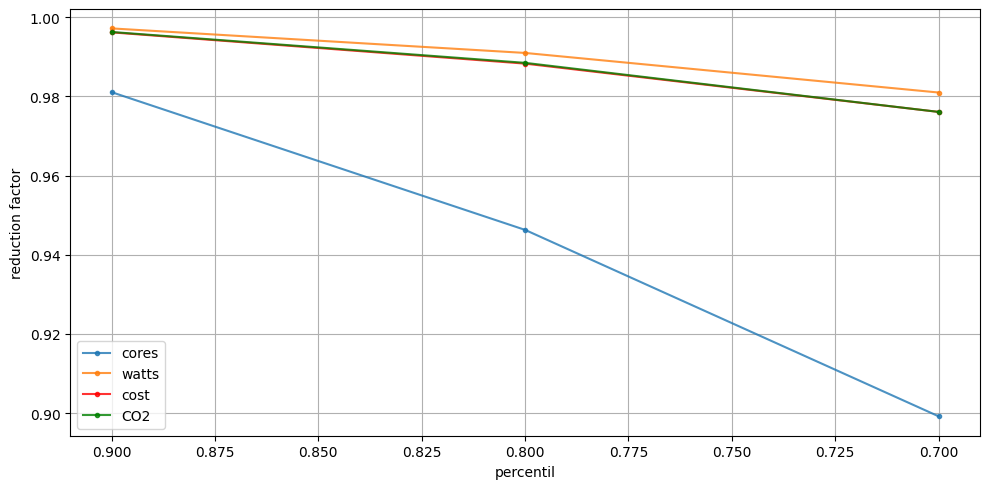

In [ ]:
factor_cores = [0.9811, 0.9463, 0.8992]
factor_watts = [0.9972, 0.9910, 0.9810]
factor_coste = [0.9962, 0.9883, 0.9761]
factor_CO2 = [0.9963, 0.9885, 0.9761]
perc = [0.9, 0.8, 0.7]

plt.figure(figsize =(10,5))
plt.plot(perc, factor_cores, marker = '.', label = 'cores', alpha = 0.8)
plt.plot(perc, factor_watts, marker = '.', label = 'watts', alpha = 0.8)
plt.plot(perc, factor_coste, marker = '.', label = 'cost', alpha = 0.8, color = 'red')
plt.plot(perc, factor_CO2, marker = '.', label = 'CO2', alpha = 0.8, color = 'green')
plt.xlabel('percentil')
plt.ylabel('reduction factor')
plt.legend()
plt.gca().invert_xaxis()
plt.grid()
plt.tight_layout()
plt.savefig("Reduction factors perc")
plt.show()

In [ ]:
import pandas as pd

url = 'https://www.basketball-reference.com/leagues/NBA_2024_per_game.html'
df24 = pd.read_html(url)[0]
df24 = df24[df24['Player'] != 'Player']
df24.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,Joel Embiid,29.0,PHI,C,39.0,39.0,33.6,11.5,21.8,...,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7,AS
1,2.0,Luka Dončić,24.0,DAL,PG,70.0,70.0,37.5,11.5,23.6,...,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9,"MVP-3,CPOY-6,AS,NBA1"
2,3.0,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,35.2,11.5,18.8,...,2.7,8.8,11.5,6.5,1.2,1.1,3.4,2.9,30.4,"MVP-4,DPOY-9,CPOY-12,AS,NBA1"
3,4.0,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,34.0,10.6,19.8,...,0.9,4.7,5.5,6.2,2.0,0.9,2.2,2.5,30.1,"MVP-2,DPOY-7,CPOY-3,AS,NBA1"
4,5.0,Jalen Brunson,27.0,NYK,PG,77.0,77.0,35.4,10.3,21.4,...,0.6,3.1,3.6,6.7,0.9,0.2,2.4,1.9,28.7,"MVP-5,CPOY-5,AS,NBA2"


In [ ]:


# Rango de años deseado
years = range(2025, 2018, -1)  # Desde 2025 hasta 2019
player_name = 'Luka Dončić'

# Lista para guardar los DataFrames anuales
player_stats = []

for year in years:
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'

    try:
        df = pd.read_html(url)[0]
        df = df[df['Player'] != 'Player']  # Elimina filas repetidas de encabezado
        df = df[df['Player'] == player_name]  # Filtra por jugador
        df['Season'] = f'{year - 1}-{str(year)[-2:]}'  # Añade temporada como "2024-25"
        player_stats.append(df)
    except Exception as e:
        print(f"No se pudo procesar el año {year}: {e}")

# Unir todos los DataFrames en uno solo
luka_df = pd.concat(player_stats, ignore_index=True)

# Mostrar el resultado
print(luka_df.head())


    Rk       Player   Age Team Pos     G    GS    MP    FG   FGA  ...  DRB  \
0  4.0  Luka Dončić  25.0  2TM  PG  50.0  50.0  35.4   9.2  20.5  ...  7.4   
1  4.0  Luka Dončić  25.0  DAL  PG  22.0  22.0  35.7   9.8  21.2  ...  7.6   
2  4.0  Luka Dončić  25.0  LAL  PG  28.0  28.0  35.1   8.8  20.0  ...  7.2   
3  2.0  Luka Dončić  24.0  DAL  PG  70.0  70.0  37.5  11.5  23.6  ...  8.4   
4  2.0  Luka Dončić  23.0  DAL  PG  66.0  66.0  36.2  10.9  22.0  ...  7.8   

   TRB  AST  STL  BLK  TOV   PF   PTS                Awards   Season  
0  8.2  7.7  1.8  0.4  3.6  2.5  28.2                   NaN  2024-25  
1  8.3  7.8  2.0  0.4  3.4  2.6  28.1                   NaN  2024-25  
2  8.1  7.5  1.6  0.4  3.7  2.4  28.2                   NaN  2024-25  
3  9.2  9.8  1.4  0.5  4.0  2.1  33.9  MVP-3,CPOY-6,AS,NBA1  2023-24  
4  8.6  8.0  1.4  0.5  3.6  2.5  32.4  MVP-8,CPOY-8,AS,NBA1  2022-23  

[5 rows x 32 columns]


In [ ]:
years = list(range(2019, 2025))
dfs = []

for year in years:
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
    df = pd.read_html(url)[0]
    df = df[df['Player'] != 'Player']  # Quitar filas duplicadas del header
    df['Season'] = year
    dfs.append(df)

all_data = pd.concat(dfs, ignore_index=True)

all_data.set_index(['Player', 'Season'], inplace=True)
all_data.sort_index(inplace=True)

In [ ]:
all_data.loc['Zion Williamson']
ppg_data = all_data.loc['Zion Williamson'][['PTS', 'AST', 'Team']].sort_values('Season')
ppg_data

,PTS,AST,Team
Season,,,
2020,22.5,2.1,NOP
2021,27.0,3.7,NOP
2023,26.0,4.6,NOP
2024,22.9,5.0,NOP


In [ ]:
df[df['Rk'].isin(df['Rk'].value_counts()[df['Rk'].value_counts() > 1].index)]

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
37,38.0,Pascal Siakam,29.0,2TM,PF,80.0,80.0,33.2,8.5,15.9,...,1.7,5.3,7.1,4.3,0.8,0.3,1.8,2.4,21.7,NaN
38,38.0,Pascal Siakam,29.0,TOR,PF,39.0,39.0,34.7,8.3,16.0,...,1.4,4.9,6.3,4.9,0.8,0.3,2.1,2.2,22.2,NaN
39,38.0,Pascal Siakam,29.0,IND,PF,41.0,41.0,31.8,8.7,15.8,...,2.1,5.7,7.8,3.7,0.8,0.4,1.4,2.6,21.3,NaN
48,47.0,RJ Barrett,23.0,2TM,SG,58.0,58.0,31.7,7.5,15.2,...,0.9,4.5,5.4,3.3,0.5,0.4,2.2,2.2,20.2,NaN
49,47.0,RJ Barrett,23.0,NYK,SG,26.0,26.0,29.5,6.3,14.9,...,0.7,3.5,4.3,2.4,0.5,0.3,1.8,1.7,18.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,511.0,P.J. Tucker,38.0,PHI,PF,3.0,3.0,22.0,0.7,1.7,...,0.3,4.3,4.7,0.0,1.0,0.7,0.7,3.0,2.0,NaN
671,511.0,P.J. Tucker,38.0,LAC,PF,28.0,7.0,15.0,0.6,1.6,...,1.0,1.6,2.5,0.6,0.5,0.2,0.2,1.6,1.6,NaN
704,544.0,Filip Petrušev,23.0,2TM,C,3.0,0.0,3.3,0.3,0.7,...,0.0,0.3,0.3,0.0,0.0,0.0,0.0,0.3,1.0,NaN
705,544.0,Filip Petrušev,23.0,PHI,C,1.0,0.0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
years = list(range(2019, 2025))
dfs = []

for year in years:
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_advanced.html'
    df = pd.read_html(url)[0]
    df = df[df['Player'] != 'Player']
    df['Season'] = year
    dfs.append(df)

all_data_adv = pd.concat(dfs, ignore_index=True)

all_data_adv.set_index(['Player', 'Season'], inplace=True)
all_data_adv.sort_index(inplace=True)

In [ ]:
all_data_adv.loc['Zion Williamson']
adv_data_adv = all_data_adv.loc['Zion Williamson'][['PER', 'AST%', 'Team']].sort_values('Season')
adv_data_adv

,PER,AST%,Team
Season,,,
2020,24.1,13.3,NOP
2021,27.1,19.7,NOP
2023,25.2,24.4,NOP
2024,22.8,26.5,NOP


In [ ]:
merged_df = all_data.join(all_data_adv, how='inner', lsuffix='_per_game', rsuffix='_advanced')
merged_df.loc['A.J. Green'].T

Season,2023,2024
Rk_per_game,391.0,363.0
Age_per_game,23.0,24.0
Team_per_game,MIL,MIL
Pos_per_game,SG,SG
G_per_game,35.0,56.0
GS_per_game,1.0,0.0
MP_per_game,9.9,11.0
FG,1.5,1.5
FGA,3.6,3.5
FG%,0.424,0.423
